Este colab fue desarrollado por Arnold Charry Armero.

# Práctica de Pandas - Generación de Código con ChatGPT

Primero, importamos las librerías,

In [1]:
# Importamos las librerías
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Diplomados/Diplomado de Programación en Python/Módulo 4 - Librerías y IA/Evidencia de Aprendizaje/Actividad 1/Ventas..csv')

Se revisa el DataFrame,

In [4]:
df.head(10)

,ID_Venta,Fecha,Producto,Cantidad,Precio_Unitario,Vendedor,Ciudad
0,1,2024-01-05,Producto A,10,100.0,Juan Pérez,Bogotá
1,2,2024-01-06,Producto B,5,200.0,María Gómez,Cali
2,3,2024-01-07,Producto A,2,100.0,Pedro Díaz,Medellín
3,4,2024-01-08,Producto C,7,150.0,Ana Ruiz,Bogotá
4,5,2024-01-09,Producto B,1,200.0,Juan Pérez,Cali
5,6,2024-01-10,Producto A,3,100.0,María Gómez,Medellín
6,7,2024-01-11,Producto C,8,150.0,Ana Ruiz,Cali
7,8,2024-01-12,Producto B,4,200.0,Pedro Díaz,Bogotá
8,9,2024-01-13,Producto A,6,100.0,Juan Pérez,Cali
9,10,2024-01-14,Producto C,10,150.0,María Gómez,Medellín


Se verifica el tema de los faltantes,

In [5]:
df.isnull().sum()

,0
ID_Venta,0
Fecha,0
Producto,0
Cantidad,0
Precio_Unitario,0
Vendedor,0
Ciudad,0


## Código Realizado por ChatGPT y Verificado por Arnold

In [6]:
# En caso de haber faltantes, así se llenarían con pandas

df_imputado = df.copy()

# Recorremos las columnas
for col in df_imputado.columns:
    if df_imputado[col].dtype in ['float64', 'int64']:
        # Verificamos si la columna tiene valores faltantes
        if df_imputado[col].isnull().sum() > 0:
            # Decidimos entre media o mediana según la asimetría (skewness)
            skewness = df_imputado[col].skew()
            if abs(skewness) < 1:
                valor = df_imputado[col].mean()  # distribución simétrica → media
            else:
                valor = df_imputado[col].median()  # distribución sesgada → mediana
            df_imputado[col].fillna(valor, inplace=True)
    else:
        # Si es categórica (objeto o categoría)
        if df_imputado[col].isnull().sum() > 0:
            valor = df_imputado[col].mode()[0]  # moda
            df_imputado[col].fillna(valor, inplace=True)

# Resultado
print("Valores faltantes después de la imputación:")
print(df_imputado.isnull().sum())

Valores faltantes después de la imputación:
ID_Venta           0
Fecha              0
Producto           0
Cantidad           0
Precio_Unitario    0
Vendedor           0
Ciudad             0
dtype: int64


In [7]:
print("=== INFORMACIÓN GENERAL ===")
print(df.info())
print("\nDimensiones del dataset:", df.shape)
print("\nValores nulos por columna:\n", df.isnull().sum())

=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Venta         10 non-null     int64  
 1   Fecha            10 non-null     object 
 2   Producto         10 non-null     object 
 3   Cantidad         10 non-null     int64  
 4   Precio_Unitario  10 non-null     float64
 5   Vendedor         10 non-null     object 
 6   Ciudad           10 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 692.0+ bytes
None

Dimensiones del dataset: (10, 7)

Valores nulos por columna:
 ID_Venta           0
Fecha              0
Producto           0
Cantidad           0
Precio_Unitario    0
Vendedor           0
Ciudad             0
dtype: int64


In [8]:
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe().T)


=== ESTADÍSTICAS DESCRIPTIVAS ===
                 count   mean        std    min     25%    50%     75%    max
ID_Venta          10.0    5.5   3.027650    1.0    3.25    5.5    7.75   10.0
Cantidad          10.0    5.6   3.169297    1.0    3.25    5.5    7.75   10.0
Precio_Unitario   10.0  145.0  43.779752  100.0  100.00  150.0  187.50  200.0


In [ ]:
df.head(10)

,ID_Venta,Fecha,Producto,Cantidad,Precio_Unitario,Vendedor,Ciudad
0,1,2024-01-05,Producto A,10,100.0,Juan Pérez,Bogotá
1,2,2024-01-06,Producto B,5,200.0,María Gómez,Cali
2,3,2024-01-07,Producto A,2,100.0,Pedro Díaz,Medellín
3,4,2024-01-08,Producto C,7,150.0,Ana Ruiz,Bogotá
4,5,2024-01-09,Producto B,1,200.0,Juan Pérez,Cali
5,6,2024-01-10,Producto A,3,100.0,María Gómez,Medellín
6,7,2024-01-11,Producto C,8,150.0,Ana Ruiz,Cali
7,8,2024-01-12,Producto B,4,200.0,Pedro Díaz,Bogotá
8,9,2024-01-13,Producto A,6,100.0,Juan Pérez,Cali
9,10,2024-01-14,Producto C,10,150.0,María Gómez,Medellín



=== MATRIZ DE CORRELACIÓN ===
                 ID_Venta  Cantidad  Precio_Unitario
ID_Venta         1.000000  0.127374         0.062869
Cantidad         0.127374  1.000000        -0.216215
Precio_Unitario  0.062869 -0.216215         1.000000


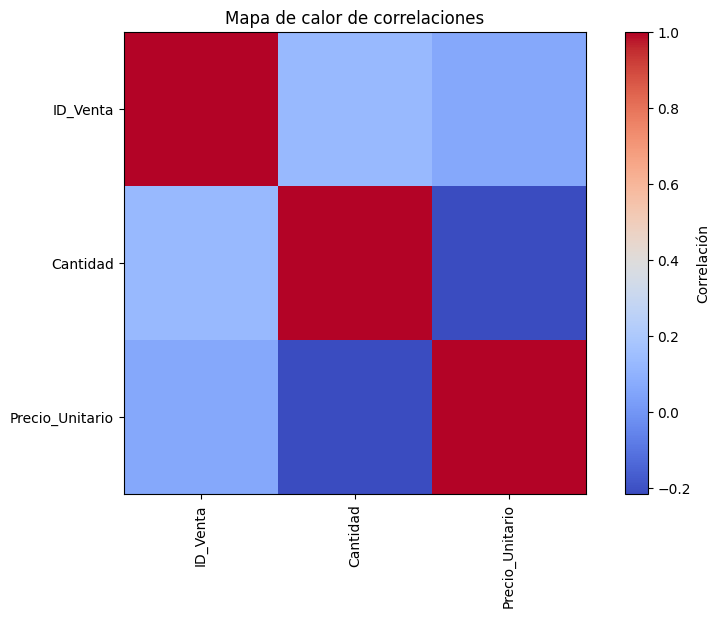

In [10]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=[np.number])
if not num_cols.empty:
    print("\n=== MATRIZ DE CORRELACIÓN ===")
    print(num_cols.corr())

    plt.figure(figsize=(10,6))
    plt.title("Mapa de calor de correlaciones")
    plt.imshow(num_cols.corr(), cmap='coolwarm', interpolation='none')
    plt.colorbar(label='Correlación')
    plt.xticks(range(len(num_cols.columns)), num_cols.columns, rotation=90)
    plt.yticks(range(len(num_cols.columns)), num_cols.columns)
    plt.show()

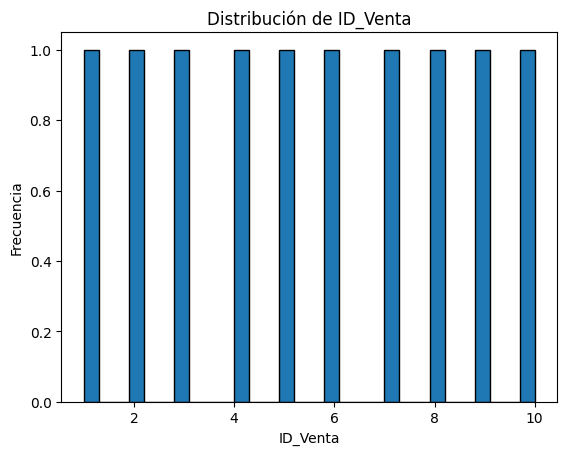

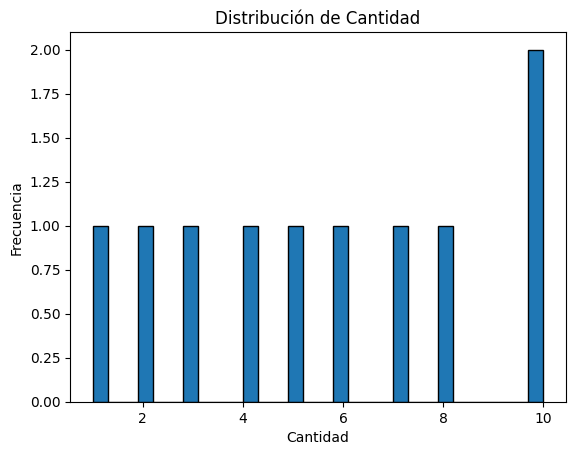

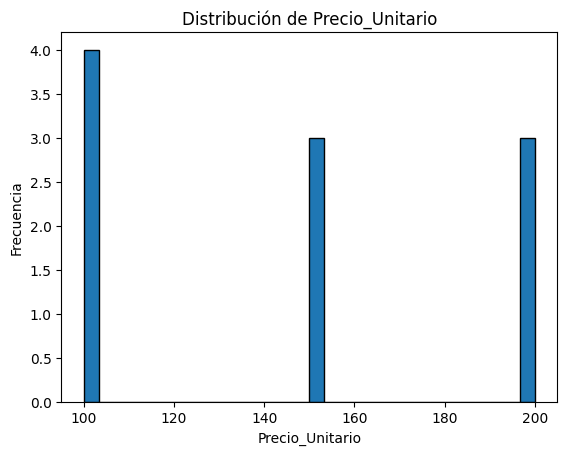

In [11]:
for col in num_cols.columns:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [12]:
for col in num_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"\n{col}: {len(outliers)} posibles valores atípicos")

print("\n✅ Análisis exploratorio completado.")


ID_Venta: 0 posibles valores atípicos

Cantidad: 0 posibles valores atípicos

Precio_Unitario: 0 posibles valores atípicos

✅ Análisis exploratorio completado.


## Código Realizado por Arnold

In [13]:
for i in range(df.shape[0]):
  df.loc[i, 'Total_Venta'] = df.loc[i, 'Precio_Unitario'] * df.loc[i, 'Cantidad']

In [14]:
df.head(10)

,ID_Venta,Fecha,Producto,Cantidad,Precio_Unitario,Vendedor,Ciudad,Total_Venta
0,1,2024-01-05,Producto A,10,100.0,Juan Pérez,Bogotá,1000.0
1,2,2024-01-06,Producto B,5,200.0,María Gómez,Cali,1000.0
2,3,2024-01-07,Producto A,2,100.0,Pedro Díaz,Medellín,200.0
3,4,2024-01-08,Producto C,7,150.0,Ana Ruiz,Bogotá,1050.0
4,5,2024-01-09,Producto B,1,200.0,Juan Pérez,Cali,200.0
5,6,2024-01-10,Producto A,3,100.0,María Gómez,Medellín,300.0
6,7,2024-01-11,Producto C,8,150.0,Ana Ruiz,Cali,1200.0
7,8,2024-01-12,Producto B,4,200.0,Pedro Díaz,Bogotá,800.0
8,9,2024-01-13,Producto A,6,100.0,Juan Pérez,Cali,600.0
9,10,2024-01-14,Producto C,10,150.0,María Gómez,Medellín,1500.0


In [15]:
df_vendedores = df.groupby('Vendedor')['Total_Venta'].sum()
display(df_vendedores)

,Total_Venta
Vendedor,
Ana Ruiz,2250.0
Juan Pérez,1800.0
María Gómez,2800.0
Pedro Díaz,1000.0


La mejor vendedora fue María Gómez con 2800 ventas.

In [16]:
df_Bogotá = df[df['Ciudad'] == 'Bogotá']
df_Bogotá.head()

,ID_Venta,Fecha,Producto,Cantidad,Precio_Unitario,Vendedor,Ciudad,Total_Venta
0,1,2024-01-05,Producto A,10,100.0,Juan Pérez,Bogotá,1000.0
3,4,2024-01-08,Producto C,7,150.0,Ana Ruiz,Bogotá,1050.0
7,8,2024-01-12,Producto B,4,200.0,Pedro Díaz,Bogotá,800.0


El total de ventas de Producto A fueron,

In [17]:
df_A = df[df['Producto'] == 'Producto A'].groupby('Producto')['Total_Venta'].sum()
display(df_A)

,Total_Venta
Producto,
Producto A,2100.0


Si queremos ver las ventas totales de cada producto,

In [18]:
df_Producto = df.groupby('Producto')['Total_Venta'].sum()
display(df_Producto)

,Total_Venta
Producto,
Producto A,2100.0
Producto B,2000.0
Producto C,3750.0


Ahora se conocerán las ventas por ciudad,

In [19]:
df_Ciudad = df.groupby('Ciudad')['Total_Venta'].sum()
display(df_Ciudad)

,Total_Venta
Ciudad,
Bogotá,2850.0
Cali,3000.0
Medellín,2000.0


Ahora las ventas por vendedor y por producto,

In [20]:
df_vendedores_producto = df.groupby(['Vendedor', 'Producto'])['Total_Venta'].sum()
display(df_vendedores_producto)

Vendedor     Producto  
Ana Ruiz     Producto C    2250.0
Juan Pérez   Producto A    1600.0
             Producto B     200.0
María Gómez  Producto A     300.0
             Producto B    1000.0
             Producto C    1500.0
Pedro Díaz   Producto A     200.0
             Producto B     800.0
Name: Total_Venta, dtype: float64

Exportar el archivo a Excel con cada DataFrame,

In [22]:
with pd.ExcelWriter('ventas_análisis.xlsx') as writer:
    df.to_excel(writer, sheet_name='DataFrame General', index=False)
    df_vendedores.to_excel(writer, sheet_name='Ventas por Vendedor', index=True)
    df_Bogotá.to_excel(writer, sheet_name='DataFrame de Bogotá', index=False)
    df_A.to_excel(writer, sheet_name='Ventas por producto A', index=True)
    df_Producto.to_excel(writer, sheet_name='Ventas por producto', index=True)
    df_Ciudad.to_excel(writer, sheet_name='Ventas por Ciudad', index=True)
    df_vendedores_producto.to_excel(writer, sheet_name='Ventas vendedor producto', index=True)